In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import iSDR_cython as ciSDR
np.random.seed(12)

In [26]:
n_t = 200
n_c, n_s = 3,10
np.random.seed(40)
G = np.abs(np.random.normal(0,1,(n_c, n_s)))
J = np.zeros((n_s, n_t))
J[:3, 0] = [10, 0.1, 0]
A = np.eye(n_s)
A[:3, :3] = np.array([[0.9,-0.4,0], [0.25, 0.97,0],[0.5,0,0.5]])
for i in range(J.shape[-1]-1):
    J[:3, i+1] = np.dot(A[:3, :3], J[:3, i])


SC = np.eye(n_s)
SC[:3, :3] = np.array([[1,1,1], [1,1,0],[1,0,1]])



(-5, 200)

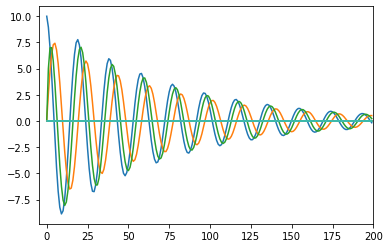

In [27]:
plt.plot(J.T)

plt.xlim(-5, n_t)

In [28]:
m_p = 1
M = np.dot(G, J[:, m_p:])


In [29]:
cll = ciSDR.linear_model.iSDR(l21_ratio=0.0001, la=[1e-1, 1], verbose=1)
cll.solver(G, M, SC, nbr_iter=10, model_p=1, A=np.eye(n_s), S_tol=1e-1, normalize=False)
R = cll.coef_

Iteration 0: nbr of active sources 10
Iteration 1: nbr of active sources 10
Iteration 2: nbr of active sources 2
Stopped at iteration 2 : Change in active set tol 2.0000 > 2.0000  


/home/bbelaouc/Wokspace/iSDR_cython/src/iSDR_cython/linear_model.py:131: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.02373956100430579, tolerance: 0.0036780925833123
  check_random_state(self.random_state), random, self.verbose)


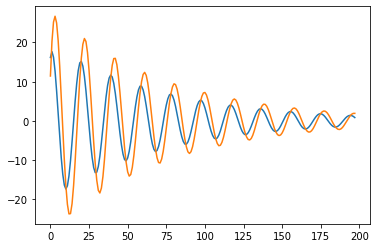

In [30]:
plt.plot(R[:, m_p:].T);

In [31]:
## grid search

In [83]:
gridsearch = {
    'l21_values':np.logspace(-5.0, 2.0, num=10),
    'la_values':np.logspace(-5, 0.0, num=10),
    'la_ratio_values':[1],
    'normalize':[0],
    'model_p':[1]
    }


In [84]:
np.logspace(-30.0, -20.0, num=10)

array([1.00000000e-30, 1.29154967e-29, 1.66810054e-28, 2.15443469e-27,
       2.78255940e-26, 3.59381366e-25, 4.64158883e-24, 5.99484250e-23,
       7.74263683e-22, 1.00000000e-20])

In [85]:
cl = ciSDR.eiSDR_cv(**gridsearch, verbose=True, max_run=500)

In [ ]:
df = cl.get_opt(G, M, SC)

Total number of combination 100
Successfully created the directory /tmp/tmp_7e431d72-c1c5-4c8d-a512-c0ee8ee6fc4d 


  0%|          | 0/100 [00:00<?, ?it/s]/home/bbelaouc/Wokspace/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4337491269517565, tolerance: 0.33241793940448255
  positive)
  1%|          | 1/100 [00:00<01:18,  1.26it/s]/home/bbelaouc/Wokspace/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7319947990561962, tolerance: 0.33241793940448255
  positive)
  9%|▉         | 9/100 [00:02<00:34,  2.61it/s]/home/bbelaouc/Wokspace/scikit-learn/sklearn/linear_model/_coordinate_descent.py:482: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9522944250994007, tolerance: 0.33241793940448255
  positive)
/home/bbelaouc/Wokspace/scikit-learn/sklearn/linear_model/_coordinate_descent.

In [ ]:
df.Obj.min()

In [ ]:
df

In [ ]:
clf = ciSDR.linear_model.iSDR(l21_ratio=df.ls_reg.values[0], la=[df.la_reg_a.values[0], df.la_reg_r.values[0]], verbose=1)
clf.solver(G, M, SC, nbr_iter=10, model_p=1, A=np.eye(n_s), S_tol=1e-3, normalize=0)
R = clf.coef_

In [ ]:
clf.active_set[-1]

In [ ]:
df.ls_reg.values[0]

In [ ]:
plt.plot(R[:, m_p+1:].T)
plt.xlim(0, n_t)

In [ ]:
plt.plot(J[:, :].T);
plt.xlim(0,n_t)

In [ ]:
df[df.Obj == df.Obj.min()]

In [ ]:
cl.results

In [ ]:
clf.Acoef_

In [ ]:
clf.get_phi()

In [ ]:
clf.eigs

In [ ]:
np.linalg.eigvals(A)